<a href="https://colab.research.google.com/github/kkiyota63/PL4/blob/main/mona_lisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tsplib95

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [3]:
import ortools.linear_solver.pywraplp as pywraplp
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import tsplib95
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = './mona_lisa_10000.tsp'

In [8]:
problem = tsplib95.load(file_path)

In [9]:
problem

In [10]:
cities = list(problem.get_nodes())

In [11]:
cities

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [12]:
num_cities = problem.dimension
num_cities

10000

In [13]:
#都市間距離のテーブルを作る　都市の数プラス１のインデックスを作る
distances = np.zeros((num_cities + 1, num_cities + 1))
for c_fr in cities:
  for c_to in [ci for ci in cities if ci != c_fr]:
    distances[c_to][c_fr] = distances[c_fr][c_to] = problem._wfunc(c_fr, c_to)

In [14]:
distances

array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,  9565., ..., 10885., 12091.,  7832.],
       [    0.,  9565.,     0., ...,  9388.,  7793.,  2725.],
       ...,
       [    0., 10885.,  9388., ...,     0., 16862.,  7047.],
       [    0., 12091.,  7793., ..., 16862.,     0.,  9815.],
       [    0.,  7832.,  2725., ...,  7047.,  9815.,     0.]])

In [26]:
np.save('./distances.npy', distances)

In [15]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


In [16]:
from deap import base, creator, tools, algorithms
import random

In [17]:
#個体(解の候補)を定義
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [18]:
#メソッドを作るメソッドを作る
toolbox = base.Toolbox()
toolbox.register('indices', random.sample,range(num_cities), num_cities)
toolbox.register('individual', tools.initIterate,creator.Individual, toolbox.indices)

In [19]:
#目的関数を作る
def evaluate(individual):
  summation = 0
  start = individual[0]
  for i in range(1,len(individual)):
    end = individual[i]
    summation += distances[start+1][end+1]
    start = end
  return summation,

#目的関数をtoolboxで登録
toolbox.register('evaluate', evaluate)

In [20]:

toolbox.register('mate', tools.cxPartialyMatched)
#突然変異
toolbox.register('mutate', tools.mutShuffleIndexes,indpb=0.01)
#選択
toolbox.register('select', tools.selTournament,tournsize=16)

In [21]:
#個体の集団を定義
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [22]:
#個体数を定義
pop = toolbox.population(n=50)

In [23]:
#初期個体集団の中から一番良い個体を選ぶ
for indi in pop:
  indi.fitness.values = toolbox.evaluate(indi)
hof = tools.ParetoFront()

In [24]:
states_fit = tools.Statistics(lambda ind: ind.fitness.values)

mstats = tools.MultiStatistics(fitness=states_fit)
mstats.register('avg', np.mean)
mstats.register('min', np.min)

In [25]:
pop, log = algorithms.eaSimple(
pop, toolbox, cxpb=0.9, mutpb=0.1,
ngen=1000, halloffame=hof,
stats=mstats)

   	      	                   fitness                    
   	      	----------------------------------------------
gen	nevals	avg       	gen	min        	nevals
0  	0     	9.9109e+07	0  	9.81599e+07	0     
1  	45    	9.88001e+07	1  	9.81565e+07	45    
2  	43    	9.82837e+07	2  	9.7749e+07 	43    
3  	48    	9.79381e+07	3  	9.75402e+07	48    
4  	47    	9.77623e+07	4  	9.74928e+07	47    
5  	45    	9.75384e+07	5  	9.73947e+07	45    
6  	48    	9.74624e+07	6  	9.7234e+07 	48    
7  	50    	9.72782e+07	7  	9.703e+07  	50    
8  	46    	9.71298e+07	8  	9.68575e+07	46    
9  	46    	9.69366e+07	9  	9.67693e+07	46    
10 	46    	9.68308e+07	10 	9.66626e+07	46    
11 	44    	9.67224e+07	11 	9.6575e+07 	44    
12 	43    	9.66348e+07	12 	9.64641e+07	43    
13 	49    	9.65606e+07	13 	9.6437e+07 	49    
14 	48    	9.64693e+07	14 	9.63167e+07	48    
15 	47    	9.63749e+07	15 	9.62244e+07	47    
16 	44    	9.6293e+07 	16 	9.62048e+07	44    
17 	48    	9.62277e+07	17 	9.6193e+07 	48    
18 	44    	9

(0.0, 25000.0)

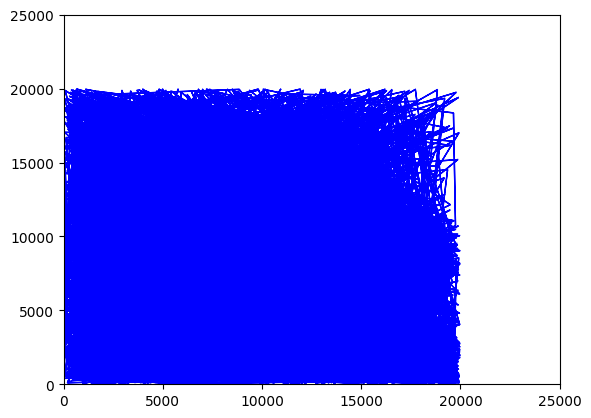

In [30]:
best_ind = tools.selBest(pop, 1)[0]
seq = list(best_ind)

for i, j in zip(seq, seq[1:]):
  st = problem.node_coords[i + 1]
  ed = problem.node_coords[j + 1]
  plt.arrow(st[0], st[1], ed[0] - st[0],ed[1] - st[1], color='blue')

  # 通過した各都市を赤く表示
#for city in seq:
#    x, y = problem.node_coords[city + 1]
#    plt.scatter(x, y, color='red')

plt.xlim(0, 25000) # 問題にあわせて調整
plt.ylim(0, 25000)